In [1]:
import pandas as pd
jsondf = pd.read_json("dim_customer.json")

df = pd.read_csv("fct_invoice.csv")

# Easy

1. How many unique customers are in the dataset?

In [2]:
print(df["customer_id"].nunique())

5191


2. What are the different categories of products available? How many unique categories are there?

In [3]:
categories = df["category"].unique()
nCategories = df["category"].nunique()

print("Available categories: ",categories)
print("Number of unique categories: ",nCategories)

Available categories:  ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of unique categories:  8


3. Which payment method is the most popular? How many times was it used?

In [4]:
popularMethod = df['payment_method'].value_counts().idxmax()
popularCount = df["payment_method"].value_counts().max()

print("Most popular payment method: ", popularMethod)
print("Times used: ", popularCount)

Most popular payment method:  Cash
Times used:  44447


# Medium

1. What are the three most popular categories, by total sales?

In [5]:
df.groupby('category').sum()["quantity"].sort_values(ascending=False).head(3)

C:\Users\migue\AppData\Local\Temp\ipykernel_9576\4063242256.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('category').sum()["quantity"].sort_values(ascending=False).head(3)


category
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Name: quantity, dtype: int64

2. What are the total sales attributed to customers over the age of 45?

In [6]:
df1 = df.rename(columns={'customer_id': 'id'}).copy()

mergeddf = pd.merge(df1, jsondf, on = ['id'], how = 'left')
mergeddf[mergeddf["age"] > 45.0].sum()['quantity']

97629

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

C:\Users\migue\AppData\Local\Temp\ipykernel_9576\1403221779.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  graphData = mergeddf.groupby("monthYear").sum()['quantity'].sort_index()


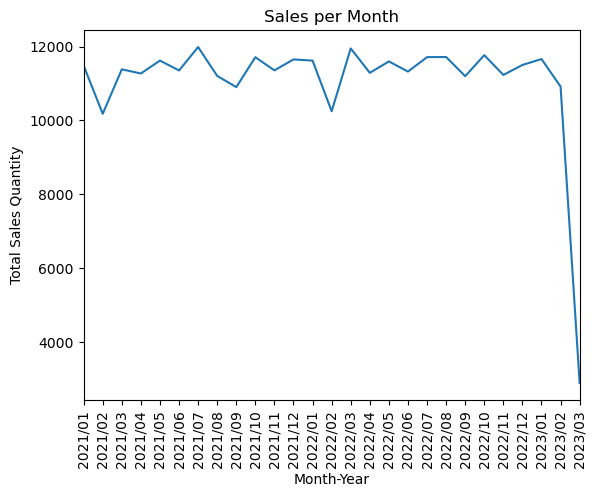

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

def dateExtract(date):
    year = date[-4:]
    month = date[date.find("/")+1:date.find("/",date.find("/")+1)]
    if len(month) == 1:
        month = "0" + str(month)
    monthYear = (year+"/"+month)
    return monthYear

mergeddf["monthYear"] = mergeddf["invoice_date"].apply(dateExtract)
graphData = mergeddf.groupby("monthYear").sum()['quantity'].sort_index()

plt.plot(graphData.index, graphData.values)
plt.xlabel("Month-Year")
plt.ylabel("Total Sales Quantity")
plt.title("Sales per Month")
plt.xticks(rotation = 90)
plt.xlim(graphData.index[0], graphData.index[-1])

plt.show()

As shown in the graph, sales are generally steady throughout the year, but have massive drops in the month of February and smaller drops in September. Nevertheless, they stabilize in the succeeding months of March and October. Furthermore, it is interesting to note that sales do not peak in December considering that December is the peak of Christmas season.

# Hard

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [8]:
pd.set_option('display.max_rows', None)
def age_Range(age):
    ageBracket = ''
    if age < 20:
        ageBracket = '10-19'
    elif age < 30:
        ageBracket = '20-29'
    elif age < 40:
        ageBracket = '30-39'
    elif age < 50:
        ageBracket = '40-49'
    elif age < 60:
        ageBracket = '50-59'
    elif age < 70:
        ageBracket = '60-69'
    elif age < 80:
        ageBracket = '70-79'
    else:
        ageBracket = '80-89'
    return ageBracket
        
mergeddf['ageRange'] = mergeddf['age'].apply(age_Range)
mergeddf.groupby(['category','ageRange']).sum()['quantity']


C:\Users\migue\AppData\Local\Temp\ipykernel_9576\3711217328.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mergeddf.groupby(['category','ageRange']).sum()['quantity']


category         ageRange
Books            10-19         229
                 20-29        1427
                 30-39        1518
                 40-49        1542
                 50-59        1364
                 60-69        1420
                 70-79        1019
                 80-89        6463
Clothing         10-19        1727
                 20-29        9392
                 30-39       10247
                 40-49       10220
                 50-59        9343
                 60-69        9700
                 70-79        7055
                 80-89       45874
Cosmetics        10-19         730
                 20-29        4060
                 30-39        4871
                 40-49        4460
                 50-59        3958
                 60-69        4344
                 70-79        2807
                 80-89       20235
Food & Beverage  10-19         697
                 20-29        3906
                 30-39        4540
                 40-49       